In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('dengue.csv')

In [3]:
df.head()

,Gender,Age,NS1,IgG,IgM,Area,AreaType,HouseType,District,Outcome
0,Female,45,0,0,0,Mirpur,Undeveloped,Building,Dhaka,0
1,Male,17,0,0,1,Chawkbazar,Developed,Building,Dhaka,0
2,Female,29,0,0,0,Paltan,Undeveloped,Other,Dhaka,0
3,Female,63,1,1,0,Motijheel,Developed,Other,Dhaka,1
4,Male,22,0,0,0,Gendaria,Undeveloped,Building,Dhaka,0


In [4]:
df.shape

(1000, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Gender     1000 non-null   object
 1   Age        1000 non-null   int64 
 2   NS1        1000 non-null   int64 
 3   IgG        1000 non-null   int64 
 4   IgM        1000 non-null   int64 
 5   Area       1000 non-null   object
 6   AreaType   1000 non-null   object
 7   HouseType  1000 non-null   object
 8   District   1000 non-null   object
 9   Outcome    1000 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 78.3+ KB


In [6]:
df['Outcome'].value_counts() # no. of dengue_positive and dengue_negative 

Outcome
1    533
0    467
Name: count, dtype: int64

In [7]:
# we can see, this is balanced data

In [8]:
dengue_positive=df[df['Outcome']==1]
dengue_positive.shape

(533, 10)

## Age analysis

Text(0, 0.5, 'frequency')

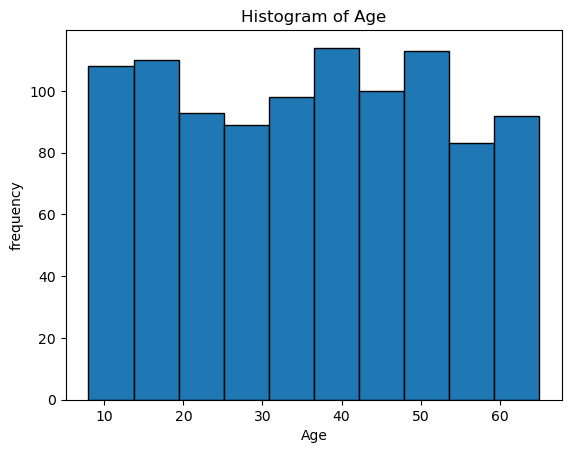

In [9]:
plt.hist(df['Age'],edgecolor='black')
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("frequency")

## Age analysis who are affected in dengue

Text(0, 0.5, 'Frequency')

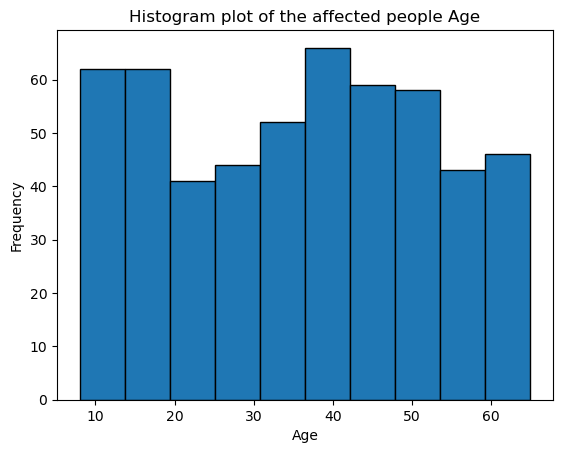

In [10]:
plt.hist(dengue_positive['Age'],edgecolor='black')
plt.title('Histogram plot of the affected people Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

In [11]:
age_counts=dengue_positive['Age'].value_counts()


([<matplotlib.patches.Wedge at 0x29b41c19950>,
 [Text(1.0944824987907502, 0.11003662954105693, '9'),
  Text(1.050674037336144, 0.32570549161438334, '40'),
  Text(0.9679079520796231, 0.522641556232405, '39'),
  Text(0.8568292181502911, 0.6898142437815857, '31'),
  Text(0.7221269743279961, 0.829778665035378, '45'),
  Text(0.5704581314914757, 0.940519813834485, '10'),
  Text(0.40819024900152423, 1.0214600925244577, '44'),
  Text(0.2411596555749638, 1.0732390323329493, '50'),
  Text(0.08097156621871363, 1.097015772659668, '16'),
  Text(-0.07450413857380754, 1.097473978432006, '29'),
  Text(-0.2284914289498177, 1.0760072801317242, '47'),
  Text(-0.37791400730568686, 1.0330445310257237, '62'),
  Text(-0.5197867680615844, 0.9694440240406316, '19'),
  Text(-0.6460391051952676, 0.8902996543627871, '14'),
  Text(-0.7557386546866751, 0.7992866105549212, '42'),
  Text(-0.85274843697151, 0.6948525766251765, '53'),
  Text(-0.9354395403270221, 0.5787511264721389, '18'),
  Text(-1.0024234809895072, 0.

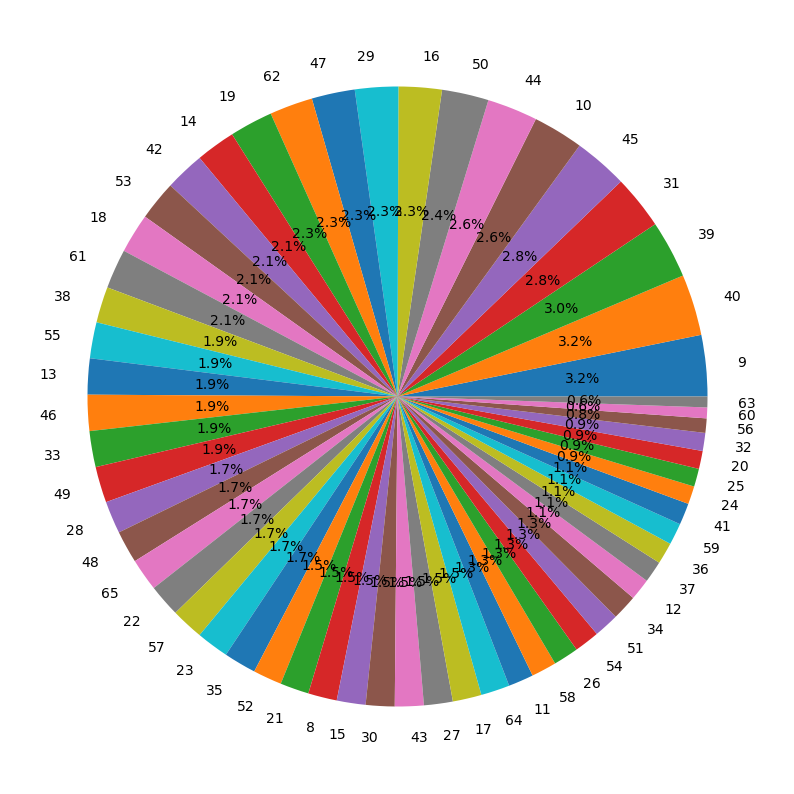

In [12]:
plt.figure(figsize=(10,16))
plt.pie(age_counts,labels=age_counts.index,autopct='%1.1f%%')

# gender 

In [13]:

gender_counts=dengue_positive['Gender'].value_counts()
gender_counts

Gender
Female    281
Male      252
Name: count, dtype: int64

Text(0.5, 1.0, 'pie chart of gender who are affected in dengue')

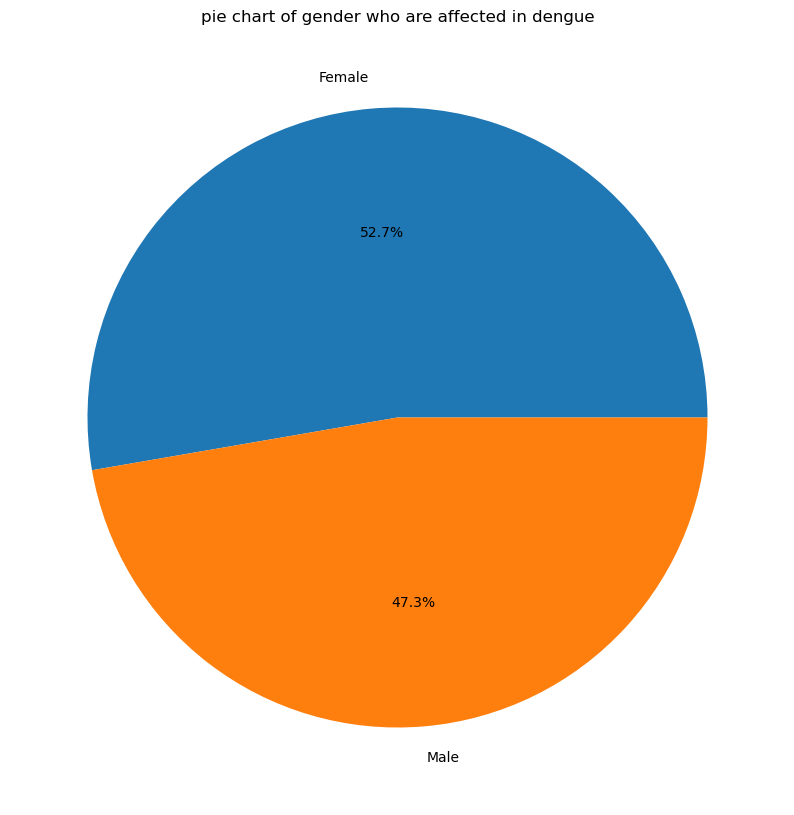

In [14]:
plt.figure(figsize=(10,16))
plt.pie(gender_counts,labels=gender_counts.index,autopct='%1.1f%%')
plt.title('pie chart of gender who are affected in dengue')

<Axes: xlabel='Gender'>

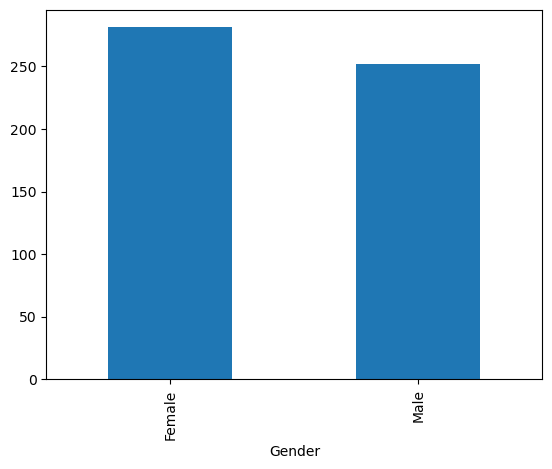

In [15]:
gender_counts.plot(kind='bar')

## Area 

In [16]:
df['Area'].value_counts().shape

(36,)

### find which area is affected

In [17]:
inf_Area=dengue_positive['Area'].value_counts()
inf_Area.shape

(36,)

Text(0.5, 1.0, 'Plot of affected Area')

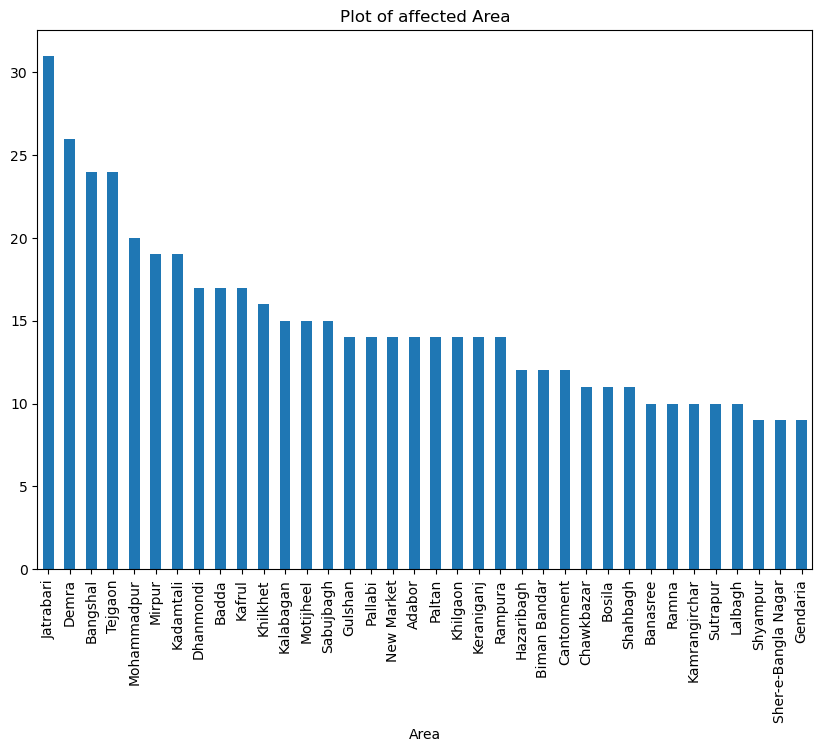

In [18]:
plt.figure(figsize=(10,7))
inf_Area.plot(kind='bar')
plt.title('Plot of affected Area')

# Area type analysis

In [19]:
AreaType_counts=df['AreaType'].value_counts()
print(AreaType_counts)

AreaType
Developed      501
Undeveloped    499
Name: count, dtype: int64


In [20]:
sns.countplot(df['AreaType'])

ValueError: could not convert string to float: 'Undeveloped'

In [ ]:
print(dengue_positive['AreaType'].value_counts())
sns.countplot(df['AreaType'],hue=df['Outcome'])
plt.title('CountPlot of affected AreaType')

## house type

In [ ]:

df['HouseType'].value_counts()


In [ ]:
sns.countplot(df['HouseType'])

In [ ]:
df.head()

In [ ]:
sns.countplot(df['HouseType'],hue=df['Outcome'])
plt.title('countplot of coutcome by House Type')

### find depending on Area, AreaType, HouseType how many people affected to dengue or not

In [ ]:
print(df.groupby(['Area','Outcome']).size().unstack())

In [ ]:

area_outcome_count=df.groupby(['Area','Outcome']).size().unstack()
area_outcome_count.plot(kind='bar',stacked=True)
plt.title('Dengue affected and not_affected count by Area')
plt.ylabel('Frequency')

In [ ]:
dengue_positive

In [ ]:
# dengue affected count by Area and AreaType
dengue_positive.groupby(['Area','AreaType']).size().unstack()

In [ ]:
sns.clustermap(dengue_positive.groupby(['Area','AreaType']).size().unstack())
plt.title('dengue affected by Area and AreaType')

In [ ]:
# let's see the affected people number greater than 15 from which Area
sns.clustermap(area_outcome_count[area_outcome_count[1]>15])
plt.title('Dengue affected people greater than 15 by Area ')

In [ ]:
# why we can't take any decision about develop and undeveloped
#lets find out

In [ ]:
sns.clustermap(dengue_positive.groupby(['Area','Gender']).size().unstack())
plt.title('Dengue affected by Area and gender')

In [ ]:
# avg age of gender
dengue_positive.groupby('Gender').mean()

In [ ]:
# count gender in AreaType
dengue_positive.groupby(['Gender','AreaType']).size().unstack()